In [15]:
import pandas as pd
import io
#Dependencies
from varname import nameof
%matplotlib inline
import dataframe_image as dfi
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain


#123

df=pd.read_excel('Example for data base.xlsx')
df = df.rename(columns={"חותמת זמן":"Time stamp"})
df=df.replace({'Category' : { 'Y' : "Antisemitic", 'W' : "Non-Antisemitic", 'U' : "Anti-Zionist" }})

df["Removed 1"]=df["Removed 1"].astype("str") 

def convert_to_category_remove_1(symbol):
    for letter in symbol:
        if letter == "X":
            return "Never"
        elif letter == "V":
            return "Second appeal"
        else:
            return "First appeal"

df["Post status"] = df["Removed 1"].apply(convert_to_category_remove_1)

status = df["Post status"]


list = ["Anti-Zionist",
"Antisemitic",
"Non-Antisemitic"]

df = df.loc[df['Category'] .isin(list)]


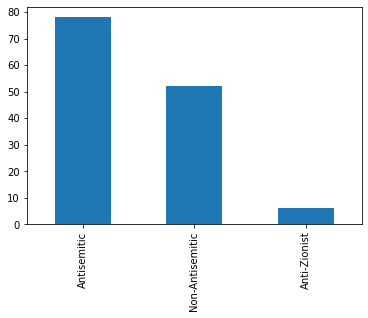

In [16]:
#Type of content in each social media platform

#Define each social platform
Instagram = df["Platform"]=="Instagram"
Twitter = df["Platform"]=="Twitter"
Facebook = df["Platform"]=="Facebook"
TikTok = df["Platform"]=="Tik Tok"
Youtube = df["Platform"]=="Youtube"

#User input
user_selection = Instagram

#Plot the categories data
df_selection = df[user_selection]
post_count_by_category_plot = df_selection['Category'].value_counts().plot(kind='bar', title = "")

plt.savefig("post_count_by_category_plot_specific.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

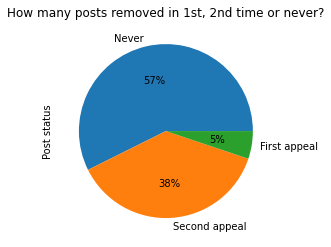

In [17]:
#Cheking the percentage of posts removing in general view

status = df_selection["Post status"]

general_removal_view = status.value_counts() #get general info about the removal process of platforms

removal_posts_statistics_plot = general_removal_view.plot(kind = "pie" , autopct='%1.0f%%', title = "How many posts removed in 1st, 2nd time or never?") 


plt.savefig("removal_posts_statistics_plot.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)



In [18]:
#תכנים שלא הוסרו למרות שקוטלגו כאנטישמיים לפי רשת

outpot_category_removal_stats= df_selection.groupby(['Post status', 'Category'])['Category'].count().unstack('Category').fillna(0).astype(int).reindex(index = ['First appeal','Second appeal','Never'])
outpot_category_removal_stats = outpot_category_removal_stats.astype("int")
print ("Non-removed content - although recognized as antisemitic")

dfi.export(outpot_category_removal_stats,"outpot_category_removal_stats.png")


Non-removed content - although recognized as antisemitic


In [23]:

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF


pdf = FPDF()

pdf.add_page()

pdf.set_font('Arial', size = 16)

pdf.cell(40)

pdf.cell(75, 10,'Report for' + " "+ nameof(user_selection) , 0, 2, 'C')

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-20)

pdf.image("post_count_by_category_plot_specific.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(20)


pdf.image("removal_posts_statistics_plot.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-20)

pdf.image("outpot_category_removal_stats.png")


pdf.output("Report for social media platforms individually.pdf")

''